In [5]:
#download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2022-01-11 03:21:20--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  16.9MB/s    in 1.4s    

2022-01-11 03:21:22 (16.9 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [6]:
#install pmdarima
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 35.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

#buat dataframe
df=pd.read_csv("sp500sub.csv", index_col="Date", parse_dates=True)

#display 5 teratas
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [8]:
# buat salinan dataframe yang hanya menampilkan kolom close saja
goog=df[df['Name']=='GOOG'][['Close']] 

#display goog
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


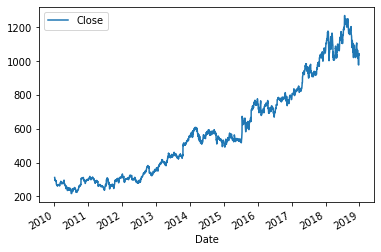

In [9]:
goog.plot()

In [31]:
#buat variable untuk data training dan testing
Ntest = 30
train = goog.iloc[:-Ntest] # sama aja kaya diatas tail(30)
test = goog.iloc[-Ntest:] # sama aja kaya tail(30)

#buat model
model = pm.auto_arima(train, error_action = 'ignore',
                      trace = True, surpress_warnings = True,
                      maxiter = 10, seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.92 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.86 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.74 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=1.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=1.36 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.29 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 8.473 seconds


In [32]:
#buat rangkuman model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Tue, 11 Jan 2022   AIC                          16264.983
Time:                        03:24:49   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
#cek paramater modelnya
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [34]:
#buat fungsi
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start = d, end = -1)
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

  fig, ax = plt.subplots(figsize = (10, 5))
  ax.plot(fulldata.index, fulldata, label = 'data')
  ax.plot(train.index[d:], train_pred, label = 'fitted')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, confint[:,0], confint[:,1],
                  color = 'red', alpha = 0.3)
  ax.legend();

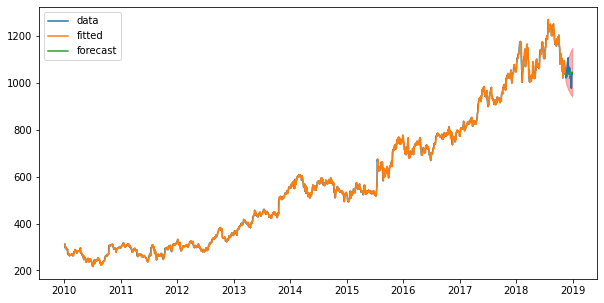

In [35]:
#tes fungsi
plot_result(model, goog, train, test)

In [36]:
#buat fungsi 2
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

  fig, ax = plt.subplots(figsize = (10, 5))
  ax.plot(test.index, test, label = 'true')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, confint[:,0], confint[:,1],
                  color = 'red', alpha = 0.3)
  ax.legend();

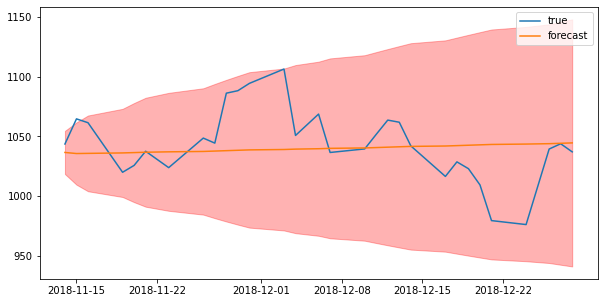

In [37]:
#tes fungsi ke2
plot_test(model, test)

In [38]:
#buat fungsi 3
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [39]:
#display rmse
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

ValueError: ignored

# Contoh kedua

In [ ]:
#buat dataframe salinan kedua untuk menampilkan close saja
aapl=df[df['Name']=='AAPL']['Close']

#buat plot
aapl.plot()

In [ ]:
#buat variable untuk data training dan testing
Ntest=30
train=aapl.iloc[:-Ntest] # sama aja kaya diatas tail(30)
test=aapl.iloc[-Ntest:] # sama aja kaya tail(30)

#buat model
model=pm.auto_arima(train,error_action='ignore',trace=True,supress_warnings=True,maxiter=10,seasonal=False)

In [ ]:
#buat rangkuman model
model.summary()

In [ ]:
#tes menggunakan fungsi pertama
plot_result(model,aapl,train,test)

In [ ]:
#tes menggunakan fungsi kedua
plot_test(model,test)

In [ ]:
#display rmse
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

# Contoh ketiga

In [ ]:
#buat dataframe salinan ketiga untuk menampilkan close saja
ibm=df[df['Name']=='IBM']['Close']

#buat plot
ibm.plot()

In [ ]:
#buat variable untuk data training dan testing
Ntest=30
train=ibm.iloc[:-Ntest] # sama aja kaya diatas tail(30)
test=ibm.iloc[-Ntest:] # sama aja kaya tail(30)

#buat model
model=pm.auto_arima(train,error_action='ignore',trace=True,supress_warnings=True,maxiter=10,seasonal=False)

In [ ]:
#buat rangkuman model
model.summary()

In [ ]:
#tes menggunakan fungsi pertama
plot_result(model,ibm,train,test)

In [ ]:
#tes menggunakan fungsi kedua
plot_test(model,test)

In [ ]:
#display rmse
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

# Contoh Keempat

In [ ]:
#buat dataframe salinan keempat untuk menampilkan close saja
sbux=df[df['Name']=='SBUX']['Close']

#buat plot
sbux.plot()

In [ ]:
#buat variable untuk data training dan testing
Ntest=30
train=sbux.iloc[:-Ntest] # sama aja kaya diatas tail(30)
test=sbux.iloc[-Ntest:] # sama aja kaya tail(30)

#buat model
model=pm.auto_arima(train,error_action='ignore',trace=True,supress_warnings=True,maxiter=10,seasonal=False)

In [ ]:
#buat rangkuman model
model.summary()

In [ ]:
#tes menggunakan fungsi pertama
plot_result(model,sbux,train,test)

In [ ]:
#tes menggunakan fungsi kedua
plot_test(model,test)

In [ ]:
#display rmse
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))